nan


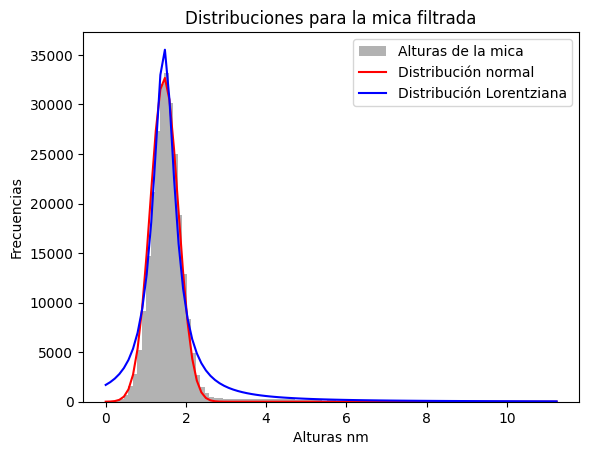

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import fitter 

def Guass(x, amp, mu, sigma):
    return amp*np.exp(-((x-mu)**2)/(2*sigma**2))

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

def lorentzian(x, amplitude, mean, gamma):
    return amplitude * gamma**2 / ((x - mean)**2 + gamma**2)

df = pd.read_csv('datos_fil.csv')


# Datos
mica_df = df[['Height', 'No']]

# Ajuste de la Guassa
popt_gauss, pcov_gauss = curve_fit(gaussian, mica_df['Height'], mica_df['No'], p0=[max(mica_df['No']), 20, np.std(mica_df['Height'])])
gauss_fit = gaussian(mica_df['Height'], *popt_gauss)

popt_lorentz, pcov_lorentz = curve_fit(lorentzian, mica_df['Height'], mica_df['No'], p0=[max(mica_df['No']), np.mean(mica_df['Height']), np.std(mica_df['Height'])])
lorentz_fit = lorentzian(mica_df['Height'], *popt_lorentz)

x = np.linspace(0, 4, 100)
# Graficar los datos y los ajustes
plt.hist(mica_df['Height'], weights=mica_df['No'], bins=100, alpha=0.6, label='Alturas de la mica', color = 'gray')
plt.plot(mica_df['Height'], gauss_fit, label='Distribución normal', color='red')
plt.plot(mica_df['Height'], lorentz_fit, label='Distribución Lorentziana', color='blue')
plt.xlabel('Alturas nm')
plt.ylabel('Frecuencias')
plt.legend()
plt.title('Distribuciones para la mica filtrada')

# Log-verosimilitud
log_likelihood = np.sum(stats.norm.logpdf(mica_df['No'], popt_gauss[1], popt_gauss[2]))

# Calcular AIC y BIC
n = len(mica_df['No'])
aic = 2 * 2 - 2 * log_likelihood

print(aic)

In [42]:
df2 = pd.read_csv('Datos.csv')


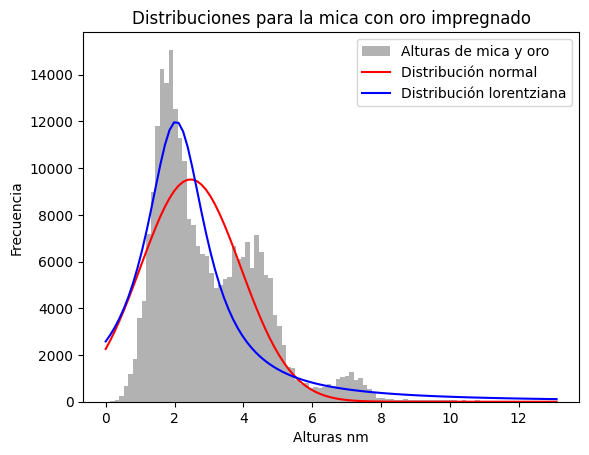

[1.19951562e+04 2.04426012e+00 1.07035609e+00] [9.51881399e+03 2.46626909e+00 1.45384012e+00]


In [57]:

Muestra1 = df2['Height1']
Muestra11 = df2['No1']
# Ajuste de la gaussiana
popt_gauss, pcov_gauss = curve_fit(gaussian, Muestra1, Muestra11, p0=[max(Muestra11), np.mean(Muestra1), np.std(Muestra1)])
gauss_fit = gaussian(Muestra1, *popt_gauss)

# Ajuste de la lorentziana
popt_lorentz, pcov_lorentz = curve_fit(lorentzian, Muestra1, Muestra11, p0=[max(Muestra11), np.mean(Muestra1), np.std(Muestra1)])
lorentz_fit = lorentzian(Muestra1, *popt_lorentz)

# Graficar los datos y los ajustes

plt.hist(Muestra1, weights=Muestra11, bins=100, alpha=0.6, label='Alturas de mica y oro', color = 'gray')
plt.plot(Muestra1, gauss_fit, label='Distribución normal', color='red')
plt.plot(Muestra1, lorentz_fit, label='Distribución lorentziana', color='blue')
plt.xlabel('Alturas nm')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribuciones para la mica con oro impregnado')
plt.show()
print(popt_lorentz, popt_gauss)

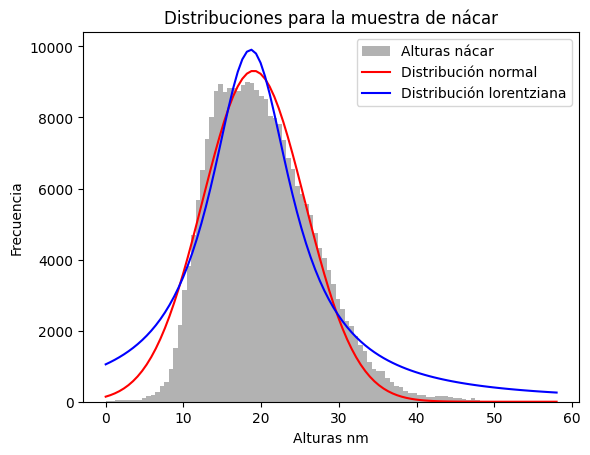

[9.31381425e+03 1.90385041e+01 6.58385351e+00]


In [44]:
Muestra1 = df2['Height2']
Muestra11 = df2['No2']
# Ajuste de la gaussiana
popt_gauss, pcov_gauss = curve_fit(gaussian, Muestra1, Muestra11, p0=[max(Muestra11), np.mean(Muestra1), np.std(Muestra1)])
gauss_fit = gaussian(Muestra1, *popt_gauss)

# Ajuste de la lorentziana
popt_lorentz, pcov_lorentz = curve_fit(lorentzian, Muestra1, Muestra11, p0=[max(Muestra11), np.mean(Muestra1), np.std(Muestra1)])
lorentz_fit = lorentzian(Muestra1, *popt_lorentz)

# Graficar los datos y los ajustes

plt.hist(Muestra1, weights=Muestra11, bins=100, alpha=0.6, label='Alturas nácar', color = 'gray')
plt.plot(Muestra1, gauss_fit, label='Distribución normal', color='red')
plt.plot(Muestra1, lorentz_fit, label='Distribución lorentziana', color='blue')
plt.xlabel('Alturas nm')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribuciones para la muestra de nácar')
plt.show()
print(popt_gauss)